In [148]:
import pandas as pd
import numpy as np

In [149]:
df_emotion = pd.read_csv("../Data/emotions_kaggle.csv")
df_augmentation = pd.read_csv("../Data/emotions_augmentation.csv")

In [150]:
df_emotion.rename(columns={"Text": "text", "Emotion": "target"}, inplace=True)
df_augmentation.rename(columns={"content": "text", "sentiment": "target"}, inplace=True)
df_augmentation.drop(["tweet_id", "author"],axis=1, inplace=True)

In [151]:
df_emotion.drop_duplicates(inplace=True)
df_augmentation.drop_duplicates(inplace=True)

In [152]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## Nombre d'émotions dans chaque dataset

In [153]:
print("Emotion:", df_emotion.target.unique())
print(100*'-')
print("Augmentation:", df_augmentation.target.unique())

Emotion: ['sadness' 'anger' 'love' 'surprise' 'fear' 'happy']
----------------------------------------------------------------------------------------------------
Augmentation: ['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [154]:
df_emotion.groupby("target").count()["text"]

target
anger       2992
fear        2651
happy       7028
love        1641
sadness     6265
surprise     879
Name: text, dtype: int64

In [155]:
df_augmentation.groupby("target").count()["text"]

target
anger          110
boredom        179
empty          827
enthusiasm     759
fun           1776
happiness     5194
hate          1323
love          3801
neutral       8617
relief        1524
sadness       5160
surprise      2187
worry         8452
Name: text, dtype: int64

Plus d'émotions différentes dans le dataframe augmentation. Deux choix:
* ajouter uniquement les données avec les mêmes sentiments entre les deux df
* ajouter les données avec les mêmes sentiments et rajouter des sentiments supp provenant d'augmentation (neutral et worry)

## Valeurs nulles ou manquantes

In [156]:
print("NaN emotion:\n",df_emotion.isna().sum())
print("Vide emotion:\n",df_emotion[df_emotion["text"]==""].count())
print(100*'-')
print("NaN augmentation:\n",df_augmentation.isna().sum())
print("Vide augmentation:\n",df_augmentation[df_augmentation["text"]==""].count())

NaN emotion:
 text      0
target    0
dtype: int64
Vide emotion:
 text      0
target    0
dtype: int64
----------------------------------------------------------------------------------------------------
NaN augmentation:
 target    0
text      0
dtype: int64
Vide augmentation:
 target    0
text      0
dtype: int64


## Exemple de texte

In [157]:
df_augmentation.head(5)

,target,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [158]:
df_emotion.head(5)

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Beaucoup de "I" dans les textes du dataframe kaggle tandis qu'il y a beaucoup d'abbréviation et de @.. dans le dataframe augmentation (tweet)  
Il faudra veiller à traiter les données différemment pour les deux dataframe

## Texthero

In [159]:
import texthero as hero

In [160]:
df_augmentation["text"].replace(r"not ","un", inplace=True, regex=True)
df_augmentation["text"].replace(r"Not ","Un", inplace=True, regex=True)
df_emotion["text"].replace(r"not ","un", inplace=True, regex=True)
df_emotion["text"].replace(r"Not ","Un", inplace=True, regex=True)

In [161]:
df_augmentation['clean_text'] = hero.clean(df_augmentation['text'])
df_emotion['clean_text'] = hero.clean(df_emotion['text'])

### Emotion

In [162]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target               
anger     feel           1787
          feeling         909
          like            477
          im              426
          really          167
          get             150
          people          150
          time            146
          know            145
          little          136
fear      feel           1454
          feeling         913
          im              383
          like            320
          little          194
          bit             143
          know            134
          really          127
          anxious         126
          still           119
happy     feel           4901
          feeling        1859
          like           1262
          im             1007
          really          373
          time            370
          know            320
          get             307
          make            274
          people          266
love      feel           1173
          feeling         456
          like    

feel, feeling, like, im et know sont des stop words dans ce jeu de données

In [163]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "ive", "one", "get"]))
df_emotion['clean_text'] = hero.remove_stopwords(df_emotion['clean_text'], custom_stopwords)

In [164]:
df_emotion.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target               
anger     really         167
          people         150
          time           146
          little         136
          want           123
          even           121
          would          118
          angry          115
          think          109
          could          108
fear      little         194
          bit            143
          really         127
          anxious        126
          still          119
          time           119
          people         106
          nervous        103
          would           94
          want            92
happy     really         373
          time           370
          make           274
          people         266
          would          265
          want           246
          good           243
          something      242
          little         240
          think          239
love      love           119
          really         107
          sweet           83
          time       

### Augmentation

On garde happiness, sadness, anger, love, surprise, worry et neutral

In [165]:
liste = ["happiness", "sadness", "anger", "love", "surprise", "worry", "neutral"]
df_augmentation = df_augmentation[df_augmentation["target"].isin(liste)]

In [166]:
df_augmentation.groupby('target')['clean_text'].apply(lambda x: hero.top_words(x)[:10])

target       
anger   quot       8
        get        8
        go         6
        work       6
        know       6
                ... 
worry   got      389
        today    377
        going    366
        know     360
        good     359
Name: clean_text, Length: 70, dtype: int64

In [167]:
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "like", "im", "know", "http", "yeah", "twitter",
                                                "get", "got","com","u", "twitpic", "ur", "n"]))
df_augmentation['clean_text'] = hero.remove_stopwords(df_augmentation['clean_text'], custom_stopwords)

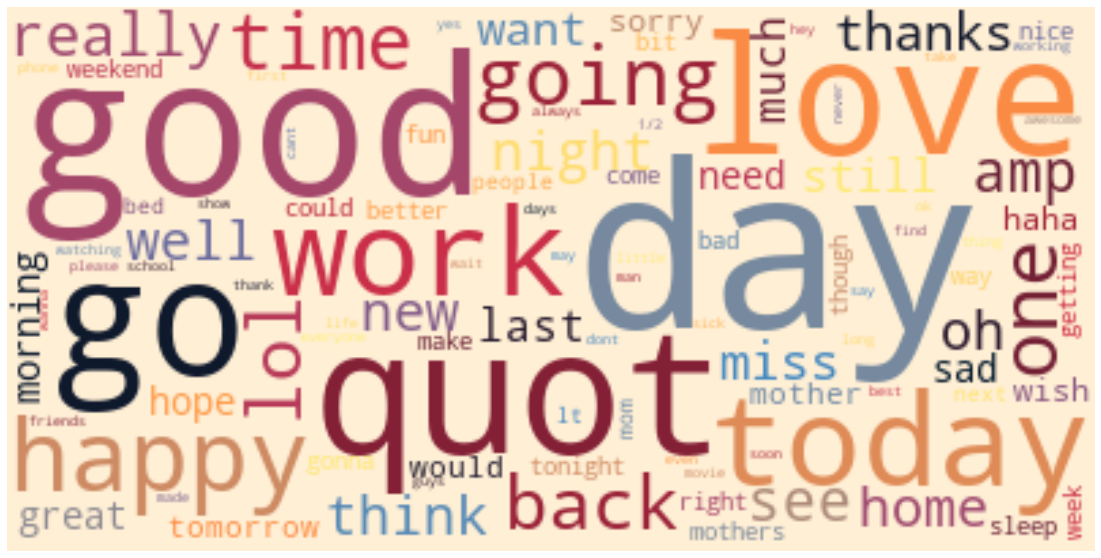

In [168]:
hero.wordcloud(df_augmentation.clean_text, max_words=100,)

In [169]:
df_augmentation.to_csv("../Data/Data_cleaned/augmentation_cleaned_rudy.csv", index=False) 
df_emotion.to_csv("../Data/Data_cleaned/emotion_cleaned_rudy.csv", index=False) 